# Zomato Sale Analysis Using Data Analysis
***
##  Questions we need to answer are
* What type of restaurant do the majority of customers order from?
* How many votes has each type of restaurant received from customers?
* What are the ratings that the majority of restaurants have received?
* Zomato has observed that most couples order most of their food online.What is their average spending on each order?
* Which mode (online or offline) has received the maximum rating?
* Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?
---

## Import essential libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("/Users/ombhor/Desktop/zomato.csv")

## Data Exploration 

In [25]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [27]:
df.shape

(148, 7)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [38]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## Data Cleaning and Preprocessing 

In [51]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

**Convert Datatype of Rate Column**

In [55]:
df['rate']=df['rate'].str.split('/').str.get(0)
df['rate']=df['rate'].astype(float)


In [57]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


---
## Q1)What type of restaurant do the majority of customers order from?

In [66]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

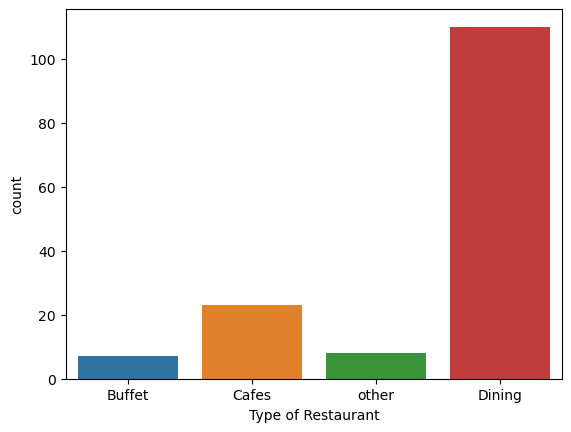

In [68]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

## Conclusion:- Majority of Restaurant fall in Dinning Category
---

## Q2)How many votes has each type of restaurant received from customers?

In [73]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [81]:
group_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})

Text(0, 0.5, 'Votes')

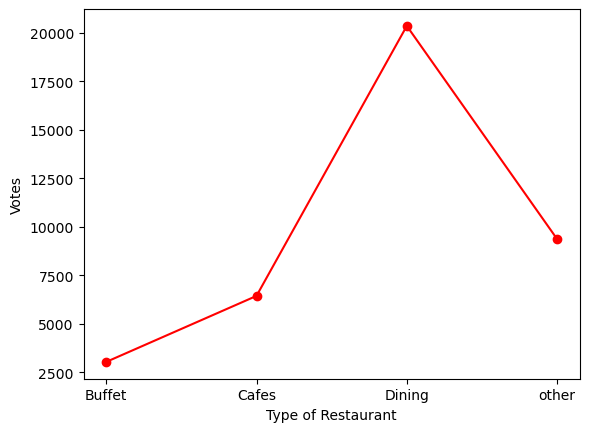

In [87]:
plt.plot(result,c='red',marker='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Votes')

## Conclusion:- Dinning has received majority of votes of customer
---
## Q3)What are the ratings that the majority of restaurants have received?

In [91]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Rating')

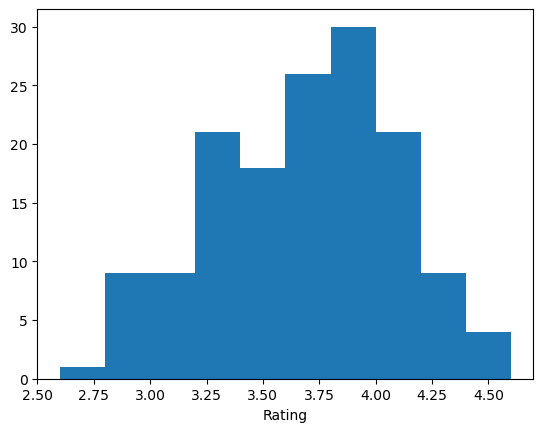

In [97]:
plt.hist(df['rate'],bins=10)
plt.xlabel('Rating')

## Conclusion:- The majority of rating restaurant have received is from 3.75 to 4.25
---
## Q4)Zomato has observed that most couples order most of their food online.What is their average spending on each order?

In [100]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

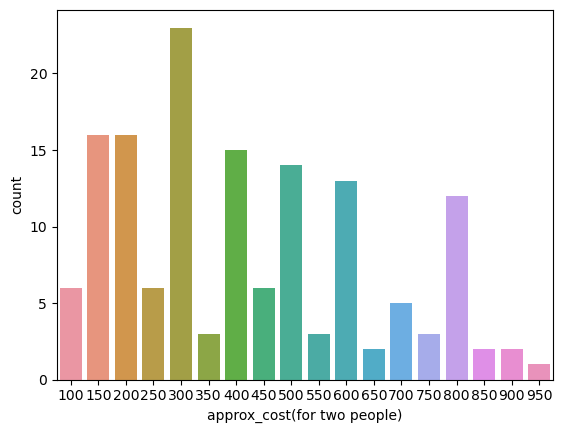

In [108]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Conclusion:- The majority of couple prefer restaurant approx spending of 300
---
## Q5)Which mode (online or offline) has received the maximum rating?

In [113]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

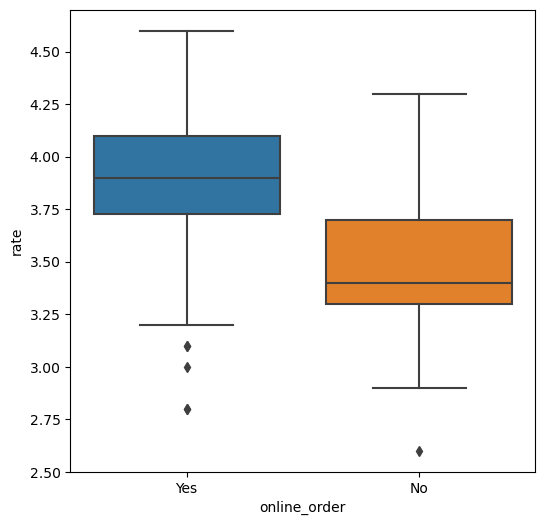

In [115]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=df)

## Conclusion:- Offline mode received lower rating than Online mode
---
## Q6)Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

In [119]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [123]:
df1=df[df['online_order']=='No']

In [125]:
df1.shape

(90, 7)

In [127]:
df1.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
13,Caf-Eleven,No,No,4.0,424,450,Cafes
18,T3H Cafe,No,No,3.9,93,300,Cafes


<Axes: xlabel='listed_in(type)', ylabel='count'>

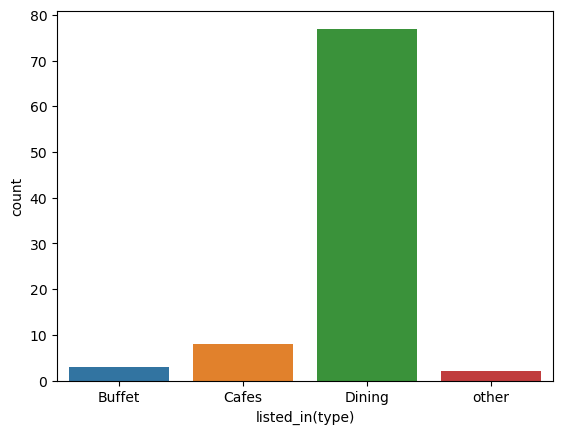

In [133]:
sns.countplot(x=df1['listed_in(type)'])

## Conclusion:- Dinning received more offline orders, so that Zomato can give customers with some good offers.
---

# **Conclusion** 
## We have performed EDA (*Exploratory Data Analysis*) on Dataset and successfully derived insights that will help company to predict upcoming future goals and how to grow faster. 
---
---